# **Machine Learning intro project - Movies database**

<a id='import_lib'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

<a id='import_data'></a>

In [2]:
df = pd.read_csv('5000_movies_bis.csv')
df.head(7)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [3]:
#how many observations / variables are there?
obs = len(df)
print(f'Number of observations = {obs}')
varis = len(df.columns)
print(f'Number of variables = {varis}')

#over how many years are the data spread?
years = max(df['title_year']) - min(df['title_year'])
print(f'Number of years covered = {years}')

#how many countries are represented?
countries_count = len(pd.unique(df['country']))
print(f'Number of countries represented = {countries_count}')

#how many different directors?
directors_count = len(pd.unique(df['director_name']))
print(f'Number of different directors = {directors_count}')

#how many different actors and actresses?
actor_values = df[["actor_1_name", "actor_2_name", "actor_3_name"]].values.ravel()
actor_names =  pd.unique(actor_values)
actors_count = len(actor_names)
print(f'Number of different actors/actresses = {actors_count}')

Number of observations = 5043
Number of variables = 28
Number of years covered = 100.0
Number of countries represented = 66
Number of different directors = 2399
Number of different actors/actresses = 6256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4360 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

<a id='data_cleaning'></a>

#### **Duplicates**

In [5]:
#count of whole rows that are duplicated
total_dups = df.duplicated().sum() #for nonduplicates do (~df.duplicated()).sum()

#count of just film names that are duplicated
fname_dups = df.movie_title.duplicated().sum()

#count of duplicates of file name and year
yearname_dups = df.duplicated(subset=['movie_title', 'title_year']).sum()

total_dups, fname_dups, yearname_dups

#extracting duplicates - decided to go with for year and film name, not just total rows
df.loc[df.duplicated(subset=['movie_title', 'title_year']), :]

#dropping duplicates in that subset, keeping first of each
df = df.drop_duplicates(subset=['movie_title', 'title_year'], keep='first')

#### **Missing values and zeros**

In [6]:
df.isnull().sum()

color                      19
director_name             102
num_critic_for_reviews     49
duration                   15
director_fb_likes         102
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     674
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             152
movie_imdb_link             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            301
budget                    400
title_year                106
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              326
movie_fb_likes              0
dtype: int64

In [7]:
#count number of zeros in whole df
(df == 0).sum().sum()

#replacing all zeros with nan
df = df.replace(0, np.nan)

df.isnull().sum()

color                       19
director_name              102
num_critic_for_reviews      49
duration                    15
director_fb_likes          981
actor_3_fb_likes           112
actor_2_name                13
actor_1_fb_likes            33
gross                      674
genres                       0
actor_1_name                 7
movie_title                  0
num_voted_users              0
cast_total_fb_likes         33
actor_3_name                23
facenumber_in_poster      2105
plot_keywords              152
movie_imdb_link              0
num_user_for_reviews        21
language                    12
country                      5
content_rating             301
budget                     400
title_year                 106
actor_2_fb_likes            68
imdb_score                   0
aspect_ratio               326
movie_fb_likes            2131
dtype: int64

### Removing variables

In [8]:
#looking at this decided to drop several columns with most NaN's that don't have much benefit
df.drop(['movie_fb_likes', 'facenumber_in_poster', 'director_fb_likes'], axis = 1, inplace=True)

#decided to delete all fb_likes except total cast, also imbd link as not useful data & color as almost all colour
df.drop(['color', 'actor_3_fb_likes', 'actor_1_fb_likes', 'actor_2_fb_likes', 'movie_imdb_link'], axis = 1, inplace=True)

#dropping language as almost all english
df['language'].value_counts()
df.drop(['language'], axis=1, inplace=True)

#dropping plot_keywords as not more than 3 occurances of each
df.plot_keywords.value_counts()
df.drop(['plot_keywords'], axis=1, inplace=True)

df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834.0,Wes Studi,3054.0,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350.0,Jack Davenport,1238.0,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700.0,Stephanie Sigman,994.0,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759.0,Joseph Gordon-Levitt,2701.0,USA,PG-13,250000000.0,2012.0,8.5,2.35
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143.0,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN


**Dealing with NaN**

In [9]:
#dropping nan where there are low numbers of them
df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','actor_2_name','actor_1_name','cast_total_fb_likes','actor_3_name','num_user_for_reviews','country'],inplace=True)

In [10]:
#dealing with content rating
#finding which is most comman rating - considered assigning it to the most comman rating (R)
df['content_rating'].value_counts()

#filling NaN's with "No rating" & adding "Unrated" to that group as well
df["content_rating"].fillna("Not Rated", inplace = True) 
df["content_rating"].replace("Unrated", "Not Rated", inplace = True) 
df['content_rating'].value_counts()

R            2064
PG-13        1399
PG            682
Not Rated     371
G             109
Approved       54
X              12
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           1
Name: content_rating, dtype: int64

In [11]:
#for gross, budget and aspect_ratio NaN's replaced with median values

#gross
df['gross'].fillna(df['gross'].median(),inplace=True)

#budget
df['budget'].fillna(df['budget'].median(),inplace=True)

#aspect_ratio
df['aspect_ratio'].fillna(df['aspect_ratio'].median(),inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4726 non-null   object 
 1   num_critic_for_reviews  4726 non-null   float64
 2   duration                4726 non-null   float64
 3   actor_2_name            4726 non-null   object 
 4   gross                   4726 non-null   float64
 5   genres                  4726 non-null   object 
 6   actor_1_name            4726 non-null   object 
 7   movie_title             4726 non-null   object 
 8   num_voted_users         4726 non-null   int64  
 9   cast_total_fb_likes     4726 non-null   float64
 10  actor_3_name            4726 non-null   object 
 11  num_user_for_reviews    4726 non-null   float64
 12  country                 4726 non-null   object 
 13  content_rating          4726 non-null   object 
 14  budget                  4726 non-null   

#### **Modifying variables**

In [12]:
#majority of films made in US or UK so grouping other countores as 'Other'
countries = df['country'].value_counts()
num = countries[:2].index
df['country'] = df.country.where(df.country.isin(num), 'other')
df['country'].value_counts()

USA      3580
other     731
UK        415
Name: country, dtype: int64

In [13]:
#changed int column to float
df['num_voted_users'] = df['num_voted_users'].astype(float)

In [14]:
#made new columns of result of gross & budget divied by millon to make for easier comparisions 
df['gross_millions'] = df['gross']/1000000
df['budget_millions'] = df['budget']/1000000

#dropped original gross & budget
df.drop(['gross', 'budget'], axis=1, inplace=True)

In [15]:
#make profit column
df['profit_millions'] = df['gross_millions']-df['budget_millions']

Notes :

duplicates - looked at where the whole row was duplicate and also where only the film name and year were duplicate - decided to remove only the later

zeros - decided to replace all zeros with NaN to avoid skewing

deleting variables:
-after deleting zeros decided to delete: movie_fb_likes, director_fb_likes, facenumber_in_poster as had a lot of NaN's
-decided to delete all fb_likes except total cast, also imbd link as not useful data & color as almost all colour
-deleted language as mostly english
-dropping plot_keywords as not more rhan 3 occurances of each

NaN's:
-dropped Na for the columns with few missing values
-filled NaN's in content_rating with most common rating
-replaced NaN's with median for gross, budget and aspect_ratio

Modifications:
-made an 'other' group for country as mostly US & UK
-changed num_voted_users from int to float
-made new columns of result of gross & budget divied by millon to make for easier comparisions & dropped original columns
-made profit column

## **Exploratory analysis**

<a id='exploration'></a>

Text(0.5, 1.0, 'Correlations')

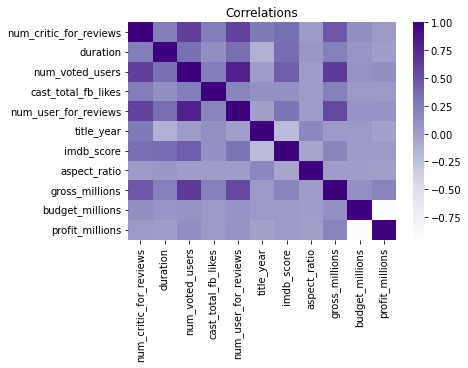

In [16]:
#general heatmap to look for areas of interest/correlation
corr = df.corr()
sns.heatmap(corr, cmap='Purples').set_title("Correlations")

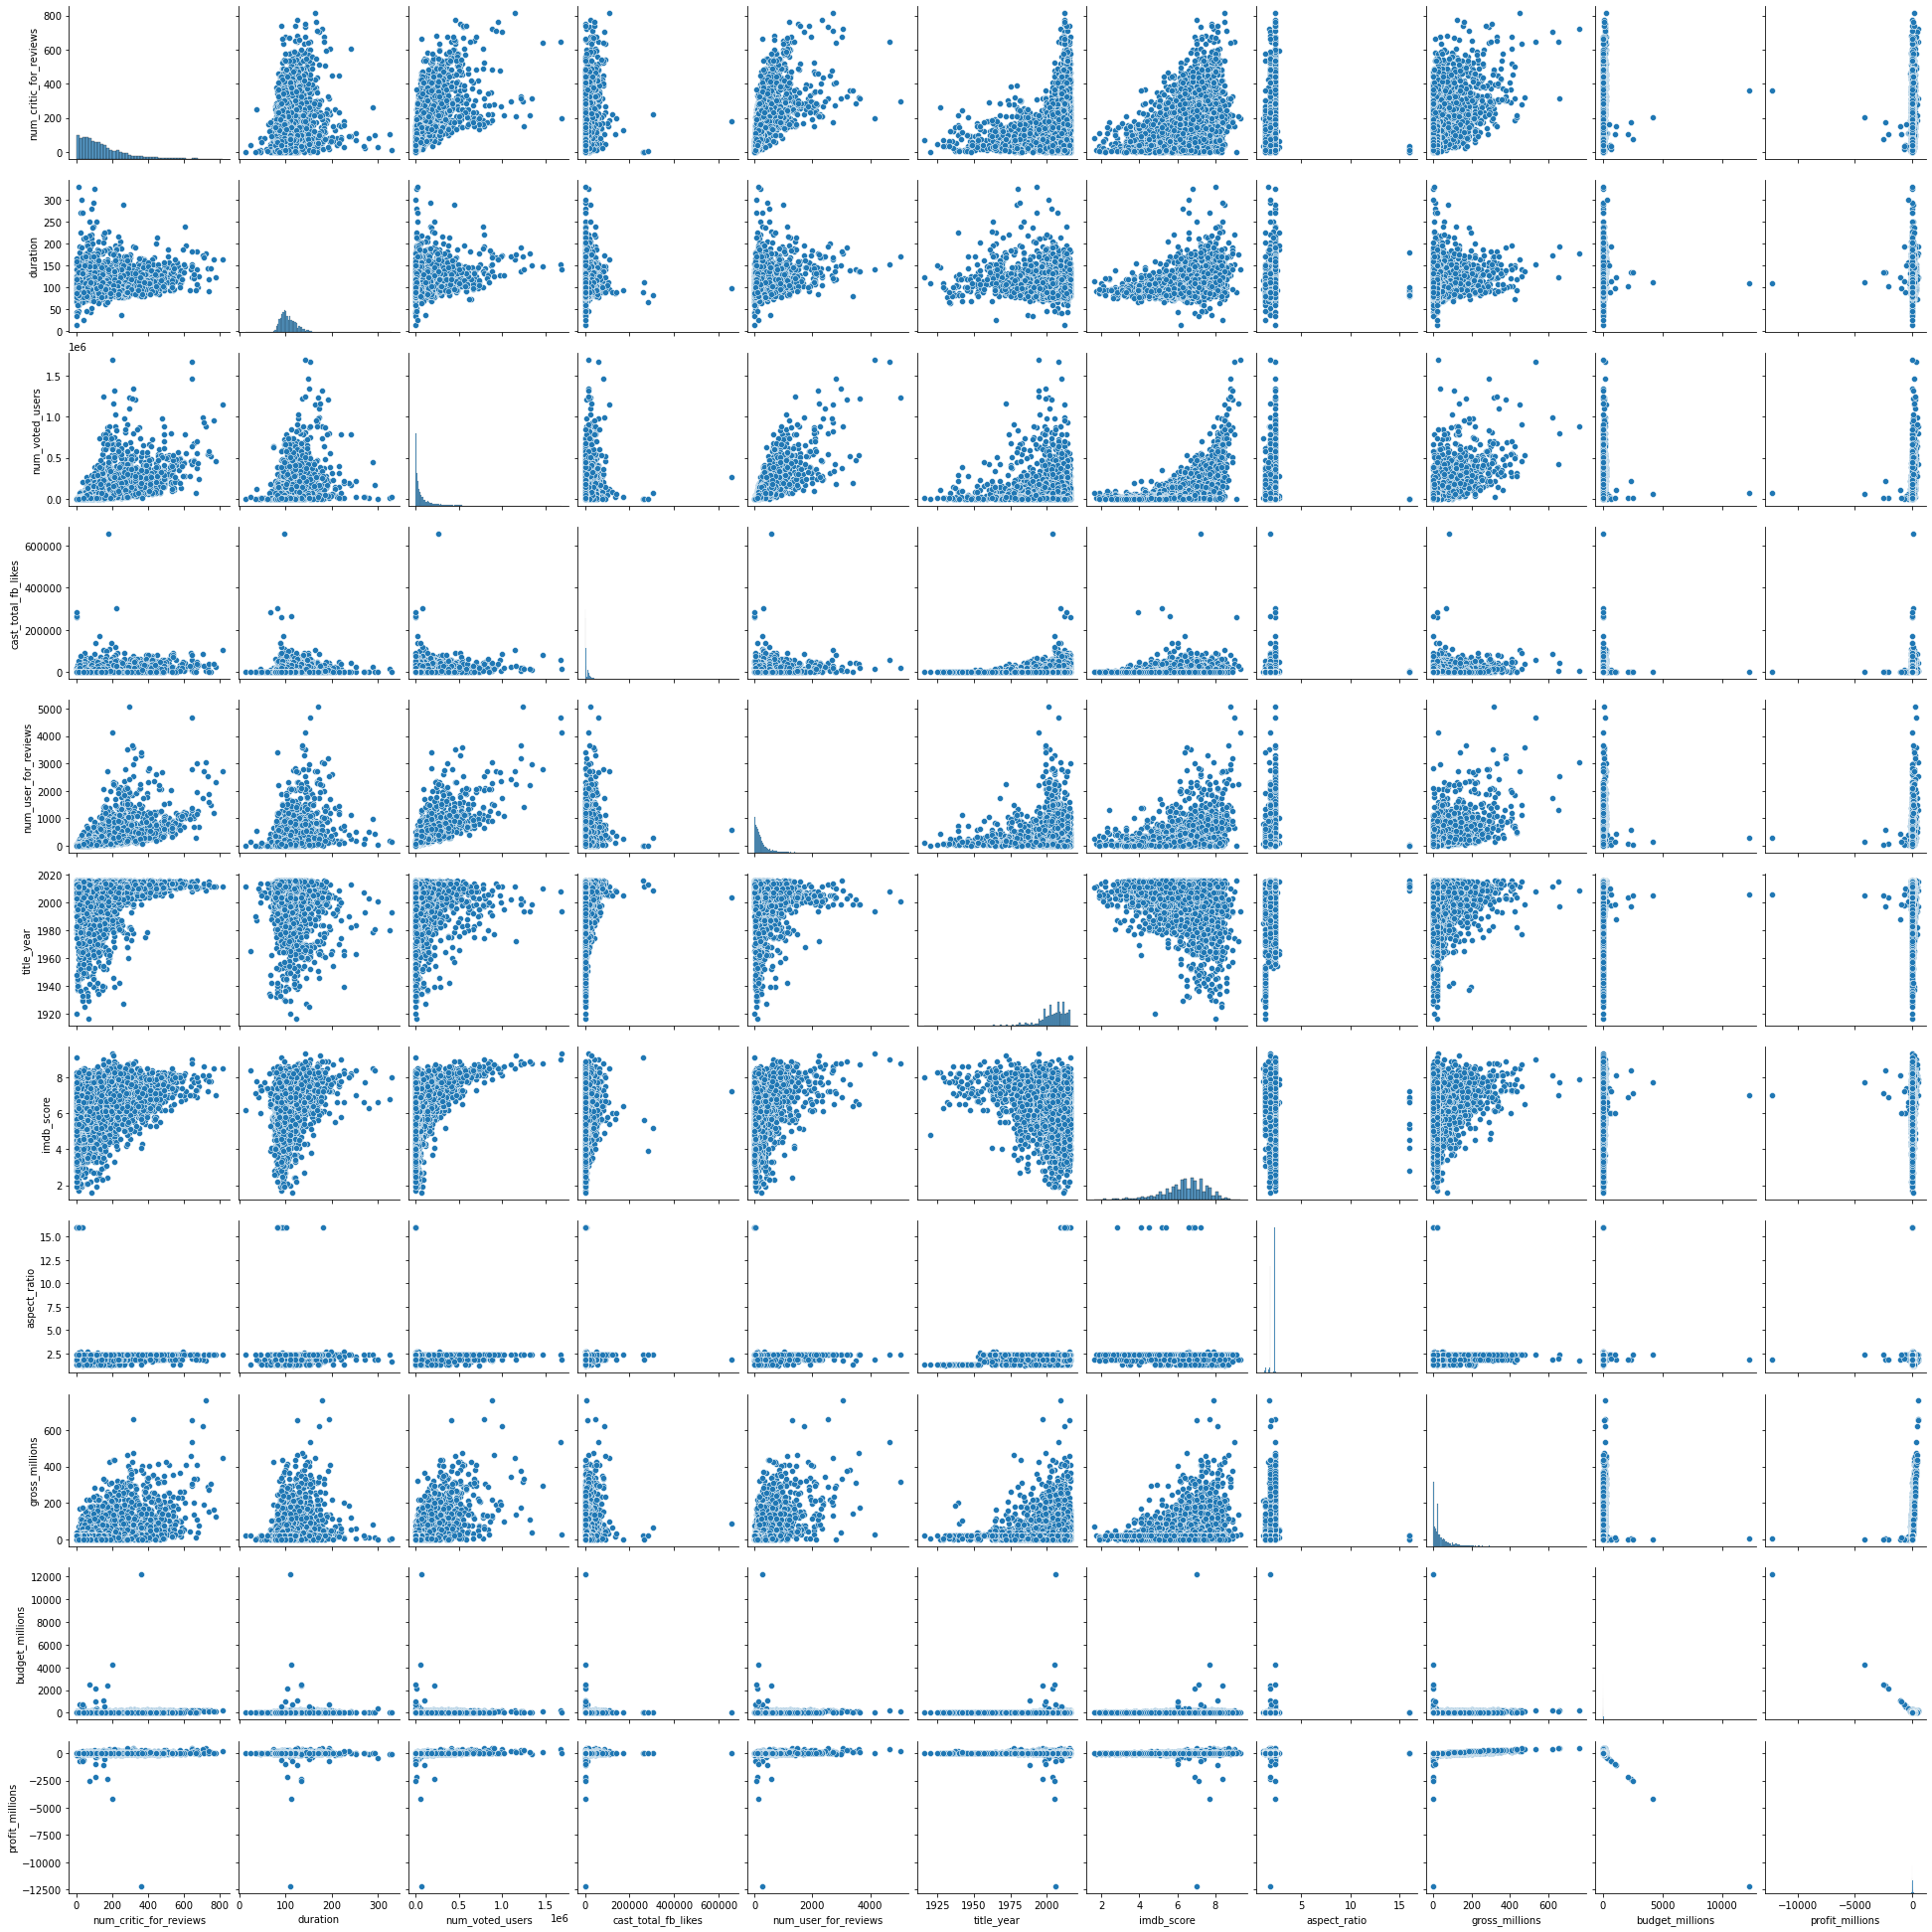

In [17]:
#pairplot to look for areas of interest/correlation
sns.pairplot(df)

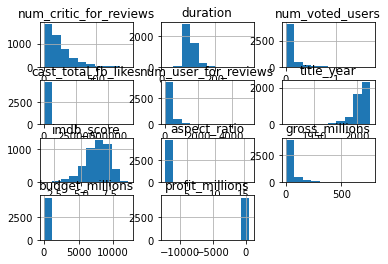

In [18]:
#general hist plot to give an idea of distribution etc
df.hist()
plt.show()

Drama          2426
Comedy         1797
Thriller       1322
Action         1084
Romance        1059
Adventure       871
Crime           830
Sci-Fi          577
Fantasy         562
Horror          528
Family          516
Mystery         457
Biography       285
Animation       232
Music           207
War             204
History         196
Sport           174
Musical         131
Western          93
Documentary      90
Film-Noir         6
News              3
Short             2
dtype: int64


<AxesSubplot:ylabel='None'>

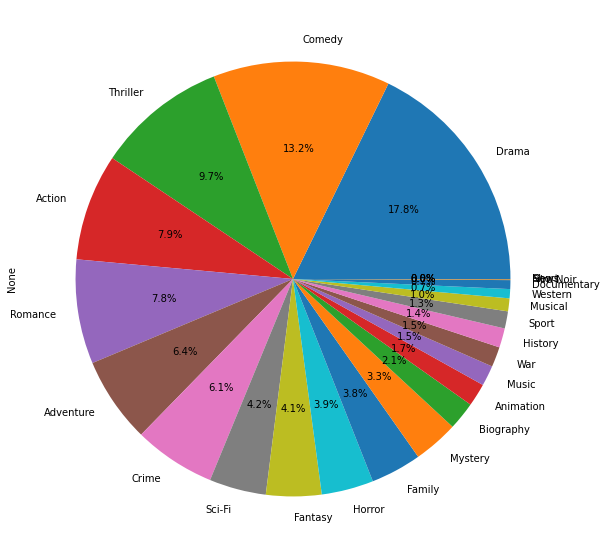

In [19]:
#seperated the genres to get a clearer idea of occurances of each type
dfg = pd.DataFrame(df.genres.str.split('|',7).tolist())
s = pd.Series(np.hstack(dfg.T.apply(pd.Series.unique))).value_counts(dropna=True)
print(s)

#pie chart of it
plt.figure(figsize=(16,10))
s.plot(kind='pie', autopct='%1.1f%%')

Text(0.5, 1.0, 'Scores over the years')

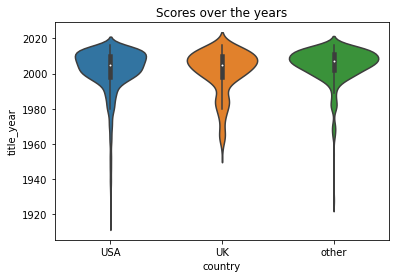

In [20]:
#years films were produced for each country 
sns.violinplot(data =df, y='title_year', x='country').set_title('Scores over the years')

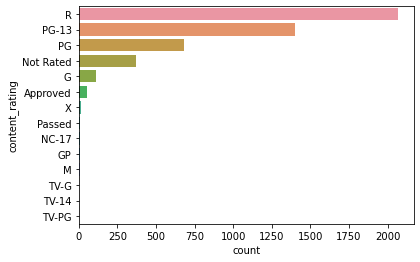

In [21]:
#counts for each rating type and ordering it
sns.countplot(y='content_rating', data=df, order = df['content_rating'].value_counts().index)
plt.show()

C:\Users\catri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='title_year', ylabel='Density'>

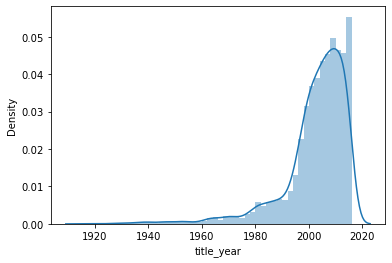

In [22]:
#distribution of title_years
sns.distplot(df.title_year)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2000.0s'),
  Text(1, 0, '2010.0s'),
  Text(2, 0, '1990.0s'),
  Text(3, 0, '1980.0s'),
  Text(4, 0, '1970.0s'),
  Text(5, 0, '1960.0s'),
  Text(6, 0, '1940.0s'),
  Text(7, 0, '1920.0s'),
  Text(8, 0, '1930.0s'),
  Text(9, 0, '1950.0s'),
  Text(10, 0, '1910.0s')])

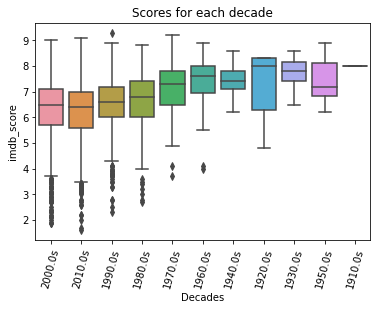

In [23]:
#create decades variable 
df['Decades'] = (10 * (df['title_year'] // 10)).astype(str) + 's'

#plot scores per decade
sns.boxplot(x='Decades', y='imdb_score', data=df).set_title("Scores for each decade")
plt.xticks(rotation = 75)

In [24]:
#looking at mean imdb score by decade
pt = pd.pivot_table(df, values=['imdb_score'], index=['Decades'], aggfunc=np.mean)
pt

,imdb_score
Decades,
1910.0s,8.000000
1920.0s,7.140000
1930.0s,7.686667
1940.0s,7.429167
1950.0s,7.442308
1960.0s,7.395775
1970.0s,7.109259
1980.0s,6.620290
1990.0s,6.516816


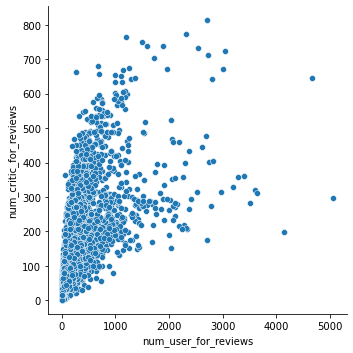

In [25]:
#critic reviews vs user reviews
sns.relplot(y="num_critic_for_reviews", x="num_user_for_reviews",data=df)

<AxesSubplot:xlabel='duration'>

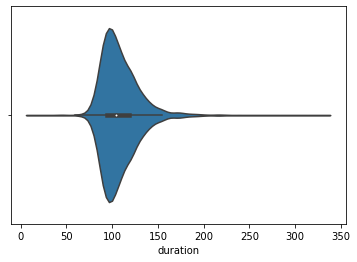

In [26]:
#duration
sns.violinplot(x=df.duration)

C:\Users\catri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_score', ylabel='Density'>

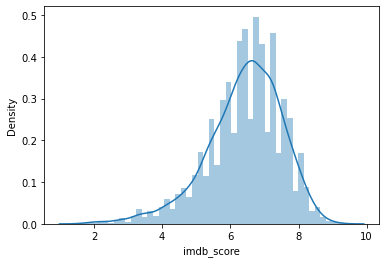

In [27]:
#scores distribution
sns.distplot(df.imdb_score)

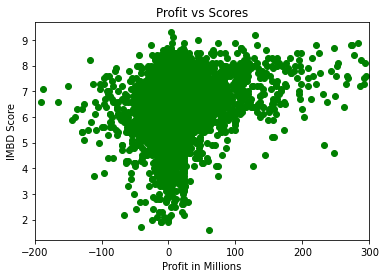

In [28]:
#Profit vs IMDB Scores
x = df.profit_millions
y = df.imdb_score
plt.scatter(x, y, c='green')
plt.xlim(-200, 300)
plt.xlabel("Profit in Millions")
plt.ylabel("IMBD Score")
plt.title('Profit vs Scores')
plt.show()

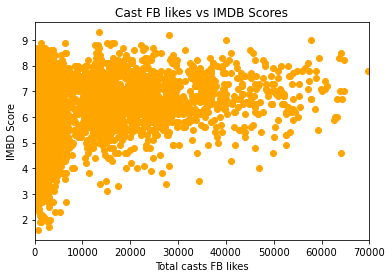

In [29]:
#total cast FB scores vs IMDB scores
x = df.cast_total_fb_likes
y = df.imdb_score
plt.scatter(x, y, c='orange')
plt.xlim(0, 70000)
plt.xlabel("Total casts FB likes")
plt.ylabel("IMBD Score")
plt.title('Cast FB likes vs IMDB Scores')
plt.show()

C:\Users\catri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


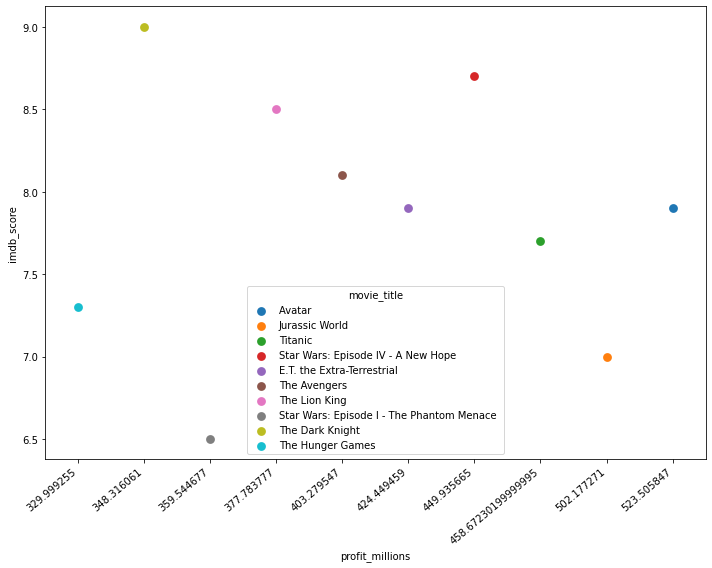

In [30]:
# profit vs score for top 10 most profitable films
plt.figure(figsize=(10,8))
df= df.sort_values(by ='profit_millions' , ascending=False)
dfp=df.head(10)
ax=sns.pointplot(dfp['profit_millions'], dfp['imdb_score'], hue=dfp['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

C:\Users\catri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


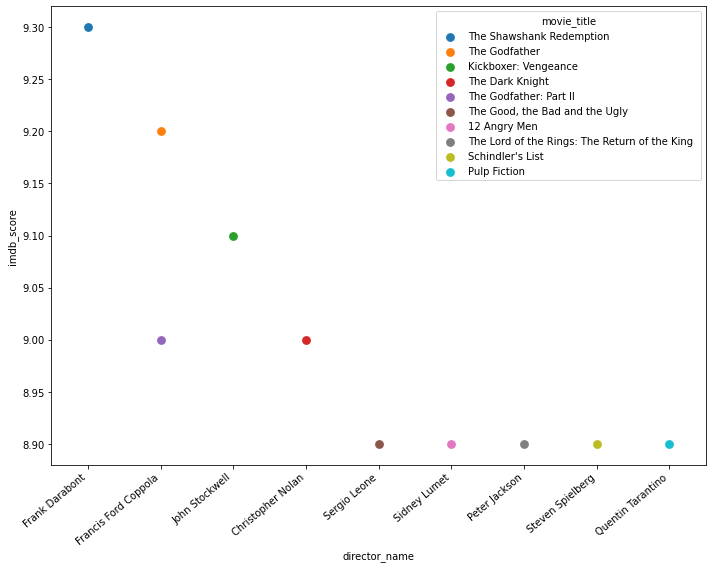

In [31]:
#directors of top 10 filmms based on the IMDB ratings
plt.figure(figsize=(10,8))
df= df.sort_values(by ='imdb_score' , ascending=False)
dfd=df.head(10)
ax=sns.pointplot(dfd['director_name'], dfd['imdb_score'], hue=dfd['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

C:\Users\catri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


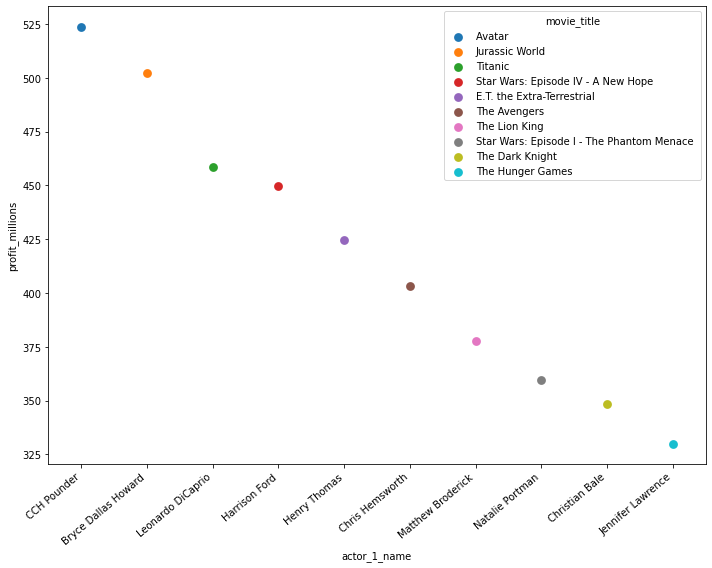

In [32]:
#1st actor of top 10 filmms based on profit
plt.figure(figsize=(10,8))
df= df.sort_values(by ='profit_millions' , ascending=False)
dfa=df.head(10)
ax=sns.pointplot(dfa['actor_1_name'], dfa['profit_millions'], hue=dfa['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 0 to 2988
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4726 non-null   object 
 1   num_critic_for_reviews  4726 non-null   float64
 2   duration                4726 non-null   float64
 3   actor_2_name            4726 non-null   object 
 4   genres                  4726 non-null   object 
 5   actor_1_name            4726 non-null   object 
 6   movie_title             4726 non-null   object 
 7   num_voted_users         4726 non-null   float64
 8   cast_total_fb_likes     4726 non-null   float64
 9   actor_3_name            4726 non-null   object 
 10  num_user_for_reviews    4726 non-null   float64
 11  country                 4726 non-null   object 
 12  content_rating          4726 non-null   object 
 13  title_year              4726 non-null   float64
 14  imdb_score              4726 non-null   

<a id='preprocess'></a>

## **Pretreatment**

In [34]:
#making new dataset for modelling
data = df

#removing names and title as not useful for modelling
data.drop(['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'movie_title'], axis=1, inplace=True)

#trying new way to sort year data - bins and dropping decades & title_year
data["year_binned"]=pd.cut(data['title_year'], bins=[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2012, 2020], right=True, labels=['1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010+'])
data.drop(['Decades', 'title_year'], axis=1, inplace=True)

#remove aspect ratio as it doesnt correlate with anything
data.drop('aspect_ratio', axis=1, inplace=True)

#remove profit as based on 2 other variables
data.drop(['profit_millions'], axis=1, inplace=True)

#replace num_user_for_reviews and num_critic_for_reviews with their ratio
data['review_ratio']=data['num_user_for_reviews']/data['num_critic_for_reviews']
data.drop(['num_critic_for_reviews','num_user_for_reviews'],axis=1,inplace=True)

#drop genres
data.drop('genres',axis=1,inplace=True)

In [35]:
#getting dummies for catagorical data

data = pd.get_dummies(data = data, columns = ['country'] , prefix = ['country'] , drop_first = True)
data = pd.get_dummies(data = data, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)
data = pd.get_dummies(data = data, columns = ['year_binned'] , prefix = ['year_binned'] , drop_first = True)

In [36]:
#train test split
from sklearn.model_selection import train_test_split
X = data.drop('imdb_score', axis=1)
y = data.imdb_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3166, 31), (1560, 31), (3166,), (1560,))

In [37]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id='reglin'></a>

## **OLS and Linear regression**

In [38]:
## OLS
from statsmodels.api import OLS, add_constant
ols = OLS(y_train, add_constant(X_train))
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          1.65e-251
Time:                        16:03:58   Log-Likelihood:                -4148.0
No. Observations:                3166   AIC:                             8358.
Df Residuals:                    3135   BIC:                             8546.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4196      0.016    400.739      0.000       6.388       6.451
x1             0.2602      0.018     14.498      0.000       0.225       0.295
x2             0.5574      0.024     23.671      0.000       0.511       0.604
x3             0.0123      0.017      0.715      0.475      -0.021       0.046
x4            -0.1179      0.023     -5.077      0.000      -0.163      -0.072
x5            -0.0077      0.016     -0.473      0.636      -0.039       0.024
x6            -0.1861      0.019     -9.946      0.000      -0.223      -0.149
x7            -0.1286      0.025     -5.228      0.000      -0.177      -0.080
x8            -0.0330      0.025     -1.336      0.182      -0.081       0.015
x9            -0.0008      0.033     -0.025      0.980      -0.066       0.064
x10            0.0150      0.017      0.875      0.382      -0.019       0.048
x11            0.0052      0.017      0.303      0.762      -0.028       0.039
x12            0.0105      0.017      0.609      0.542      -0.023       0.044
x13            0.0404      0.053      0.770      0.441      -0.063       0.143
x14           -0.0182      0.070     -0.258      0.796      -0.156       0.120
x15           -0.1013      0.091     -1.110      0.267      -0.280       0.078
x16           -0.0175      0.019     -0.921      0.357      -0.055       0.020
x17            0.0146      0.099      0.147      0.883      -0.180       0.209
x18           -0.0440      0.017     -2.564      0.010      -0.078      -0.010
x19           -0.0097      0.017     -0.577      0.564      -0.043       0.023
x20         5.571e-17   1.06e-17      5.281      0.000     3.5e-17    7.64e-17
x21            0.0131      0.019      0.703      0.482      -0.023       0.050
x22            0.1145      0.040      2.888      0.004       0.037       0.192
x23            0.2157      0.068      3.153      0.002       0.082       0.350
x24            0.2053      0.067      3.080      0.002       0.075       0.336
x25            0.2184      0.077      2.836      0.005       0.067       0.369
x26            0.2769      0.113      2.453      0.014       0.056       0.498
x27            0.3159      0.143      2.212      0.027       0.036       0.596
x28            0.4198      0.214      1.964      0.050       0.001       0.839
x29            0.6986      0.360      1.939      0.053      -0.008       1.405
x30            0.7743      0.452      1.714      0.087      -0.111       1.660
x31            0.4970      0.333      1.493      0.136      -0.156       1.150
==============================================================================
Omnibus:                      397.179   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.634
Skew:                          -0.822   Prob(JB):                    1.79e-155
Ku

In [39]:
#importing and training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#getting scores
lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)
print(f"{lr_train=} et {lr_test=}")

# predictions
y_pred = lr.predict(X_test)

# The coefficients
print("Coefficients: \n", lr.coef_)

#mean squared error
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, lr.predict(X_train), squared=False)
mse_test = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print(f"{mse_train=} et {mse_test=}")

#trying different cross validation scorings on test data
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_validate

print(f'LR cross val score = {cross_val_score(lr, X, y, cv=5)}')

cross_validate(lr, X, y, cv=5, scoring=dict(r2='r2', mse=make_scorer(mean_squared_error)),
              return_train_score=False)


lr_train=0.33523513151208684 et lr_test=0.3247798852253182
Coefficients: 
 [ 2.60197679e-01  5.57372694e-01  1.22688159e-02 -1.17880184e-01
 -7.65026986e-03 -1.86094220e-01 -1.28643257e-01 -3.30025506e-02
 -8.39892066e-04  1.49523635e-02  5.17291038e-03  1.04598414e-02
  4.04396650e-02 -1.81723124e-02 -1.01288346e-01 -1.75455881e-02
  1.45993065e-02 -4.39677955e-02 -9.67566125e-03  3.08086889e-15
  1.31055286e-02  1.14451755e-01  2.15654525e-01  2.05272506e-01
  2.18381063e-01  2.76910443e-01  3.15940082e-01  4.19776053e-01
  6.98623032e-01  7.74254554e-01  4.96972438e-01]
mse_train=0.8969421939512365 et mse_test=0.9348752834512516
LR cross val score = [ 0.07849499  0.33223411  0.19229335  0.26728389 -2.2257144 ]


{'fit_time': array([0.00400019, 0.        , 0.        , 0.01565814, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_r2': array([ 0.07849499,  0.33223411,  0.19229335,  0.26728389, -2.2257144 ]),
 'test_mse': array([0.87833647, 1.01508585, 0.98108726, 0.86374148, 3.47657346])}

<a id='autres_reg'></a>

## **KNN**

In [62]:
#KNN regression - importation and training
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

#scoring
knn_train = knn.score(X_test, y_test)
knn_test = knn.score(X_train, y_train)
print(f"{knn_train=} et {knn_test=}")

# cross validation
print(f'KNN cross val score = {cross_val_score(knn, X, y, cv=5)}')
cross_validate(knn, X, y, cv=5, scoring=dict(r2='r2', mse=make_scorer(mean_squared_error)),
              return_train_score=False)

knn_train=0.33159435214149124 et knn_test=0.5193414654459395
KNN cross val score = [ 0.24948738  0.15884604 -0.01793533  0.00791633 -0.0108886 ]


{'fit_time': array([0.        , 0.        , 0.        , 0.00300288, 0.        ]),
 'score_time': array([0.06250548, 0.07857585, 0.0758431 , 0.06355667, 0.06250572]),
 'test_r2': array([ 0.24948738,  0.15884604, -0.01793533,  0.00791633, -0.0108886 ]),
 'test_mse': array([0.71535433, 1.27865693, 1.23644317, 1.16948952, 1.08950392])}

In [41]:
#grid search
from sklearn.model_selection import GridSearchCV
knngrid = GridSearchCV(estimator=knn, param_grid={'n_neighbors': list(range(1,21))},
               cv=5,
                scoring='neg_mean_squared_error',
               return_train_score=False)
knngrid.fit(X, y)
knngrid.best_params_

{'n_neighbors': 20}

<a id='irr'></a>

<a id='reg_to_class'></a>

## **Turning the regression problem into a classification problem**

Transform the regression problem into a classification problem by discretizing the IMDB score into 5 classes: nul, bof, sympa, bon, super (bad, bad, nice, good, great)


In [43]:
#binning scores into 5 equal groups
data2 = data
data2['binned_score']=pd.cut(data2['imdb_score'], bins=[0,2,4,6,8,10], right=True, labels=['nul', 'bof', 'sympa', 'bon', 'super'])

#droppng scores
data2.drop('imdb_scores', axis=1, inplace=True)

In [44]:
#redoing train test split etc
X2 = data2.drop('binned_score', axis=1)
y2 = data2.binned_score
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=12)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

#scaling
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

<a id='reglog'></a>

## **Logistic regression**

In [45]:
#training
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train2,y_train2)

y_pred2=logreg.predict(X_test2)

#scoring
logreg_score = logreg.score(X_test2, y_test2)
print(f'{logreg_score=}')

#odds ratio


logreg_score=0.9692307692307692


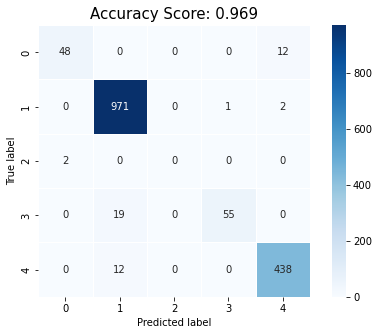

In [46]:
# confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(logreg_score)
plt.title(all_sample_title, size = 15)

In [47]:
#cross validation
logreg_scores = cross_val_score(logreg, X_train2, y_train2, cv=10)
print('Logistic regression Cross-Validation Accuracy Scores', logreg_scores)

C:\Users\catri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Logistic regression Cross-Validation Accuracy Scores [0.97476341 0.96845426 0.98107256 0.9873817  0.95268139 0.97160883
 0.98417722 0.97151899 0.97468354 0.95886076]


<a id='autre_class'></a>

## **Other classification models**

### Decision Tree

Text(0.5, 1.0, 'Accuracy Score: 1.000')

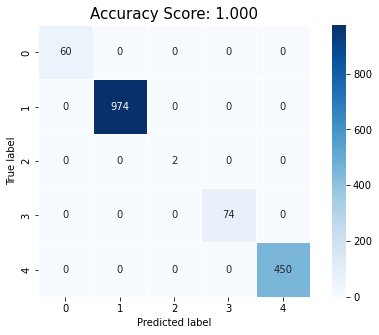

In [50]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train2, np.ravel(y_train2,order='C'))
dtree_pred = dtree.predict(X_test2)
cnf = confusion_matrix(y_test2, dtree_pred)
tree_score = accuracy_score(y_test2, dtree_pred)

plt.figure(figsize=(8,5))
sns.heatmap(cnf, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(tree_score)
plt.title(all_sample_title, size = 15)

In [51]:
#cross validation
tree_scores = cross_val_score(dtree, X_train2, y_train2, cv=10)
print('Decision Tree Cross-Validation Accuracy Scores', tree_scores)

Decision Tree Cross-Validation Accuracy Scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\catri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


## Random Forest

Text(0.5, 1.0, 'Accuracy Score: 0.994')

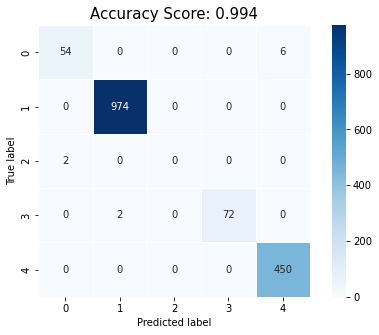

In [70]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train2, np.ravel(y_train2,order='C'))
rfc_pred = rfc.predict(X_test2)
cnf_rfc = confusion_matrix(y_test2, rfc_pred)
forest_score = accuracy_score(y_test2, rfc_pred)

plt.figure(figsize=(8,5))
sns.heatmap(cnf_rfc, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');
rfc_title = 'Accuracy Score: {:.3f}'.format(forest_score)
plt.title(rfc_title, size = 15)

## Gradient boosting classifier

Text(0.5, 1.0, 'Accuracy Score: 1.000')

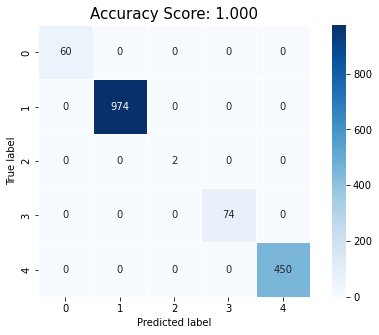

In [56]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbc.fit(X_train2,np.ravel(y_train2,order='C'))
gbc_pred = gbc.predict(X_test2)
gbc_cnf = confusion_matrix(y_test2, gbc_pred)
gbc_score = accuracy_score(y_test2, gbc_pred)

plt.figure(figsize=(8,5))
sns.heatmap(gbc_cnf, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');
gbc_title = 'Accuracy Score: {:.3f}'.format(gbc_score)
plt.title(gbc_title, size = 15)

## XG Boosting Classifier

C:\Users\catri\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Accuracy Score: 1.000')

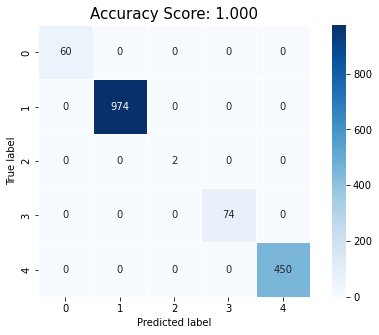

In [58]:
#XGBoosting
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train2, np.ravel(y_train2,order='C'))
xgb_pred = xgb.predict(X_test2)
xgb_cnf = confusion_matrix(y_test2, xgb_pred)
xgb_score = accuracy_score(y_test2, xgb_pred)

plt.figure(figsize=(8,5))
sns.heatmap(xgb_cnf, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');
xgb_title = 'Accuracy Score: {:.3f}'.format(xgb_score)
plt.title(xgb_title, size = 15)

<a id='option'></a>

<a id='reco'></a>